In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam

import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]) / 255
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]) / 255

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
class Autoencoder(Model):
    def __init__(self, latent_dim, shape):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape
        self.encoder = tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(latent_dim, activation = 'relu'),
        ])
        self.decoder = tf.keras.Sequential([
        layers.Dense(tf.math.reduce_prod(shape).numpy(), activation = 'sigmoid'),
        layers.Reshape(shape)
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [13]:
shape = x_test.shape[1:]
print(shape)

(784,)


In [24]:
latent_dim = 10
autoencoder = Autoencoder(latent_dim, shape)

In [25]:
autoencoder.compile(optimizer = 'adam', loss = losses.MeanSquaredError())

In [26]:
autoencoder.fit(x_train, x_train, epochs = 10, shuffle = True, validation_data = (x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 1s 625us/step - loss: 0.0479 - val_loss: 0.0341
Epoch 2/10
1875/1875 [==============================] - 1s 567us/step - loss: 0.0332 - val_loss: 0.0319
Epoch 3/10
1875/1875 [==============================] - 1s 557us/step - loss: 0.0317 - val_loss: 0.0309
Epoch 4/10
1875/1875 [==============================] - 1s 550us/step - loss: 0.0310 - val_loss: 0.0303
Epoch 5/10
1875/1875 [==============================] - 1s 566us/step - loss: 0.0306 - val_loss: 0.0301
Epoch 6/10
1875/1875 [==============================] - 1s 569us/step - loss: 0.0304 - val_loss: 0.0299
Epoch 7/10
1875/1875 [==============================] - 1s 565us/step - loss: 0.0302 - val_loss: 0.0298
Epoch 8/10
1875/1875 [==============================] - 1s 569us/step - loss: 0.0301 - val_loss: 0.0297
Epoch 9/10
1875/1875 [==============================] - 1s 567us/step - loss: 0.0300 - val_loss: 0.0296
Epoch 10/10
1875/1875 [==============================] - 1s 590u

In [27]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
reconst_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [28]:
print(encoded_imgs.shape)
print(reconst_imgs.shape)

(10000, 10)
(10000, 784)


In [29]:
reconst_imgs0 = reconst_imgs.reshape(reconst_imgs.shape[0], 28, 28)
print(reconst_imgs0.shape)

(10000, 28, 28)


In [30]:
x_test0 = x_test.reshape(x_test.shape[0], 28, 28)
print(x_test0.shape)

(10000, 28, 28)


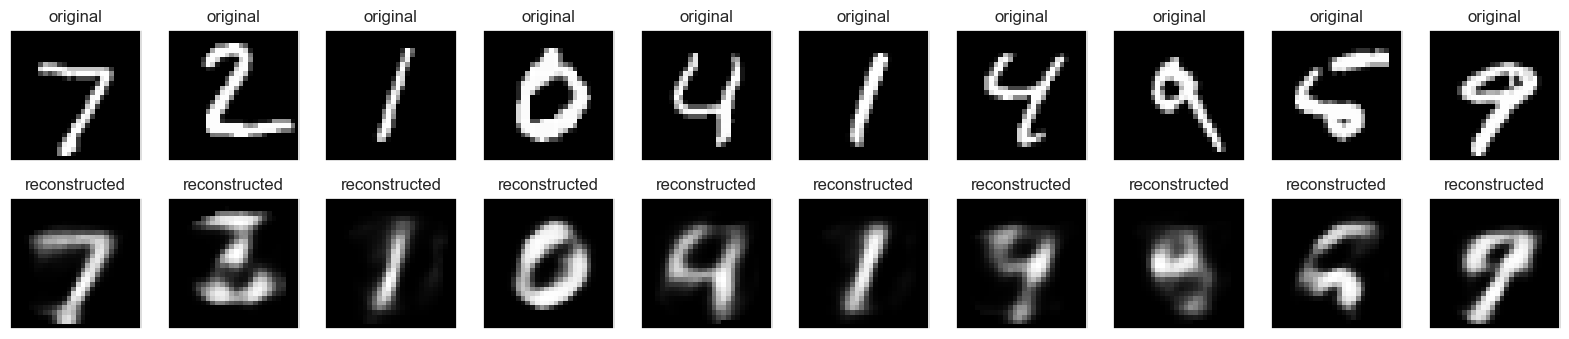

In [31]:
n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test0[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconst_imgs0[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()